<a href="https://colab.research.google.com/github/Raqueljrp/Dise-o-Experimental/blob/main/Copia_de_202506_DOE_DBCA_FORM3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño de Experimentos 2025**
# **Formato para Trabajar en Colab 2025**
# **Escribe el Nombre del Curso**: Estadística Computarizada
## **Escribe tu nombre completo**: Raquel Jimena Rey Prada
> Email: rrey@utb.edu.co

> Celular:3006613549

> Código Estudiantil: T00057965

> Github:

## **TEMA 1: Diseños en Bloques Completamente aleatorizados DBCA**



<a name="inicio"></a>


## **1.** [Librerias básicas](#T1)
## **2.** [Ejemplo de un Diseños en Bloques Completos al Azar - DBCA](#T2)

## **3.** [El DataFrame de los datos](#T3)

## **4.** [Analisis descriptivo de la variable](#T4)

## **5.** [Acediendo a algunos atributos del DataFrame](#T5)

## **6.** [BoxPlot para DBCA](#T6)

## **7.** [Análisis de Varianza - Anova](#T7)


## **8.** [Comparaciones Múltiples](#T8)

## **9.** [Supuesto del Modelo - Normalidad](#T9)


## **10.** [Homocedasticidad](#T10)





[⬆️ Volver al inicio](#inicio)

<a name="T1"></a>
## **1. Librerías Básicas**

In [ ]:
# @title **Librerias de Python**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats


[⬆️ Volver al inicio](#inicio)

<a name="T2"></a>
## **2. Ejemplo de un Diseños en Bloques Completos al Azar - DBCA**


## **A.Problema de aplicacion: Control de Temperatura en Silos de Leche**


+ _En una empresa se tienen varios silos para almacenar leche (tanques de **10,000 litros**).  
Un aspecto crítico para que se conserve la leche es la **temperatura de almacenamiento**._  

+ _Se sospecha que en algunos silos hay problemas, por ello durante **cinco días** se decide registrar la temperatura a cierta hora crítica.  
La temperatura de un día a otro puede ser una fuente de **variabilidad** que podría impactar la variabilidad total._

## **B. Datos registrados (Temperatura en °C)**

| Silo | Lunes | Martes | Miércoles | Jueves | Viernes |
|------|-------|--------|-----------|--------|---------|
| A    | 3.0   | 2.5    | 2.0       | 3.0    | 2.0     |
| B    | 4.0   | 3.0    | 2.0       | 3.5    | 3.5     |
| C    | 4.5   | 4.0    | 3.5       | 5.5    | 5.0     |
| D    | 2.5   | 2.0    | 3.0       | 3.0    | 2.5     |
| E    | 3.5   | 4.0    | 3.5       | 3.0    | 3.0     |


**Hipótesis Nula (H₀):** No hay diferencia significativa en la temperatura promedio entre los diferentes silos.

**Hipótesis Alterna (H₁):** Al menos un silo tiene una temperatura promedio significativamente diferente a los demás.

[⬆️ Volver al inicio](#inicio)

<a name="T3"></a>
## **3. El DataFrame de los datos**

In [16]:
# @title **El DataFrame de los datos de Silos de Leche**
data = {'Silo': ['A', 'B', 'C', 'D', 'E'],
        'Lunes': [3.0, 4.0, 4.5, 2.5, 3.5],
        'Martes': [2.5, 3.0, 4.0, 2.0, 4.0],
        'Miércoles': [2.0, 2.0, 3.5, 3.0, 3.5],
        'Jueves': [3.0, 3.5, 5.5, 3.0, 3.0],
        'Viernes': [2.0, 3.5, 5.0, 2.5, 3.0]}

df_silos = pd.DataFrame(data)
display(df_silos)

,Silo,Lunes,Martes,Miércoles,Jueves,Viernes
0,A,3.0,2.5,2.0,3.0,2.0
1,B,4.0,3.0,2.0,3.5,3.5
2,C,4.5,4.0,3.5,5.5,5.0
3,D,2.5,2.0,3.0,3.0,2.5
4,E,3.5,4.0,3.5,3.0,3.0


In [17]:
# Melt the DataFrame to long format
df_silos_long = df_silos.melt(id_vars='Silo', var_name='Dia', value_name='Temperatura')

display(df_silos_long)

,Silo,Dia,Temperatura
0,A,Lunes,3.0
1,B,Lunes,4.0
2,C,Lunes,4.5
3,D,Lunes,2.5
4,E,Lunes,3.5
5,A,Martes,2.5
6,B,Martes,3.0
7,C,Martes,4.0
8,D,Martes,2.0
9,E,Martes,4.0


[⬆️ Volver al inicio](#inicio)

<a name="T4"></a>
## **4. Analisis descriptivo de la variable**

In [18]:
# **Analisis descriptivo de la variable**
df_silos_long.describe()


,Temperatura
count,25.000000
mean,3.240000
std,0.914239
min,2.000000
25%,2.500000
50%,3.000000
75%,3.500000
max,5.500000


[⬆️ Volver al inicio](#inicio)

<a name="T5"></a>
## **5. Acediendo a algunos atributos del DataFrame**

In [19]:
#@title **a Nombre de las columnas**
df_silos_long.columns

Index(['Silo', 'Dia', 'Temperatura'], dtype='object')

In [20]:
#@title **b Tipo de variables**
df_silos_long.dtypes

,0
Silo,object
Dia,object
Temperatura,float64


In [21]:
#@title **c. Contar las observaciones de una de las variables**
df_silos_long["Temperatura"].value_counts()

,count
Temperatura,
3.0,7
3.5,5
2.0,4
4.0,3
2.5,3
4.5,1
5.5,1
5.0,1


In [22]:
#@title **d. Contar las observaciones**
df_silos_long["Silo"].value_counts()

,count
Silo,
A,5
B,5
C,5
D,5
E,5


In [23]:
#@title **e. Contar las observaciones**
df_silos_long["Dia"].value_counts()

,count
Dia,
Lunes,5
Martes,5
Miércoles,5
Jueves,5
Viernes,5


In [24]:
#@title **f. Contar las observaciones**
df_silos_long[["Temperatura"]].describe()

,Temperatura
count,25.000000
mean,3.240000
std,0.914239
min,2.000000
25%,2.500000
50%,3.000000
75%,3.500000
max,5.500000


[⬆️ Volver al inicio](#inicio)

<a name="T6"></a>
## **6. BoxPlot para DBCA**

<Axes: title={'center': 'Temperatura vs Silos'}, xlabel='Silo', ylabel='Temperatura'>

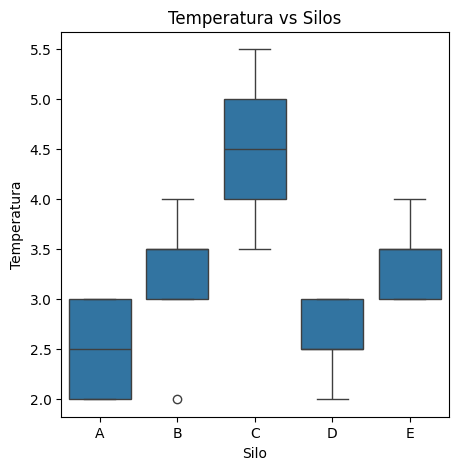

In [25]:
#@title **A. BoxPlot para DBCA: Temperatura vs Silos**
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('Temperatura vs Silos')
sns.boxplot(x="Silo", y='Temperatura',data=df_silos_long,ax=ax)

<Axes: title={'center': 'Temperatura vs Dias'}, xlabel='Dia', ylabel='Temperatura'>

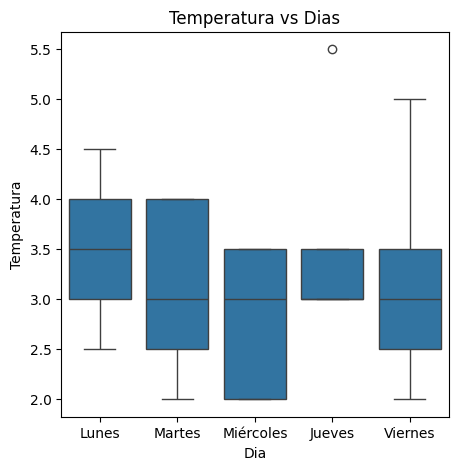

In [27]:
#@title **B. BoxPlot para DBCA: Temperatura vs Dias**
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('Temperatura vs Dias')
sns.boxplot(x="Dia", y='Temperatura',data=df_silos_long,ax=ax)

[⬆️ Volver al inicio](#inicio)

<a name="T7"></a>
## **7. Análisis de Varianza - Anova**


In [29]:
# @title **Análisis de Varianza - Anova (Tipo 1)**
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova_stats # Import anova module specifically

# Melt the DataFrame to long format (assuming df_silos is available)
# If df_silos is not available, you might need to add the code to create it.
try:
    df_silos_long = df_silos.melt(id_vars='Silo', var_name='Dia', value_name='Temperatura')
except NameError:
    print("Error: df_silos DataFrame not found. Please create it first.")
    # You might want to add code here to create df_silos if it's not in the notebook
    # For example:
    # data = {'Silo': ['A', 'B', 'C', 'D', 'E'],
    #         'Lunes': [3.0, 4.0, 4.5, 2.5, 3.5],
    #         'Martes': [2.5, 3.0, 4.0, 2.0, 4.0],
    #         'Miércoles': [2.0, 2.0, 3.5, 3.0, 3.5],
    #         'Jueves': [3.0, 3.5, 5.5, 3.0, 3.0],
    #         'Viernes': [2.0, 3.5, 5.0, 2.5, 3.0]}
    # df_silos = pd.DataFrame(data)
    # df_silos_long = df_silos.melt(id_vars='Silo', var_name='Dia', value_name='Temperatura')


# Fit the linear model
modelo = smf.ols('Temperatura ~ Silo + Dia', data=df_silos_long).fit()

# Perform Type 1 ANOVA
anova_table = anova_stats.anova_lm(modelo, typ=1) # Use the alias for the anova module

# Display the ANOVA table
display(anova_table)

,df,sum_sq,mean_sq,F,PR(>F)
Silo,4.0,12.86,3.21500,10.007782,0.000297
Dia,4.0,2.06,0.51500,1.603113,0.221868
Residual,16.0,5.14,0.32125,NaN,NaN


**Conclusión del ANOVA:**

Observando la tabla ANOVA (Tipo 1) generada en la celda anterior:

*   **Silo:** El valor p para 'Silo' es **0.0003** (aproximadamente). Dado que este valor es menor que el nivel de significancia común de 0.05, **rechazamos la hipótesis nula** para los silos. Esto significa que hay una diferencia estadísticamente significativa en la temperatura promedio entre al menos dos de los silos.

*   **Dia:** El valor p para 'Dia' es **0.2219** (aproximadamente). Dado que este valor es mayor que 0.05, **no rechazamos la hipótesis nula** para los días. Esto sugiere que no hay una diferencia estadísticamente significativa en la temperatura promedio a través de los diferentes días.

En resumen, el análisis de varianza indica que la temperatura promedio varía significativamente entre los diferentes silos, pero no hay evidencia significativa de que varíe entre los días.

[⬆️ Volver al inicio](#inicio)

<a name="T8"></a>
## **8. Comparaciones Múltiples**

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B      0.7 0.3773 -0.4355  1.8355  False
     A      C      2.0 0.0003  0.8645  3.1355   True
     A      D      0.1 0.9988 -1.0355  1.2355  False
     A      E      0.9 0.1642 -0.2355  2.0355  False
     B      C      1.3   0.02  0.1645  2.4355   True
     B      D     -0.6 0.5254 -1.7355  0.5355  False
     B      E      0.2 0.9835 -0.9355  1.3355  False
     C      D     -1.9 0.0006 -3.0355 -0.7645   True
     C      E     -1.1 0.0605 -2.2355  0.0355  False
     D      E      0.8 0.2552 -0.3355  1.9355  False
----------------------------------------------------


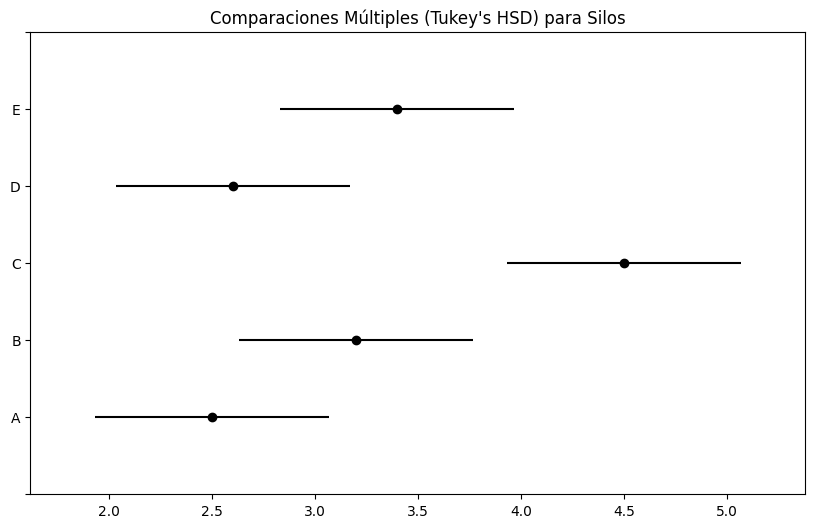

In [33]:
# @title **A. Comparaciones Múltiples (Tukey's HSD) para Silos**
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Perform Tukey's HSD test on the 'Silo' variable
tukey_silo = pairwise_tukeyhsd(endog=df_silos_long['Temperatura'],     # Data
                               groups=df_silos_long['Silo'],          # Groups
                               alpha=0.05)                            # Significance level

# Display the results
print(tukey_silo)

# Plot the results
tukey_silo.plot_simultaneous()
plt.title('Comparaciones Múltiples (Tukey\'s HSD) para Silos')
plt.show()

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
   Jueves     Lunes     -0.1 0.9998 -1.8954 1.6954  False
   Jueves    Martes     -0.5  0.917 -2.2954 1.2954  False
   Jueves Miércoles     -0.8 0.6746 -2.5954 0.9954  False
   Jueves   Viernes     -0.4 0.9613 -2.1954 1.3954  False
    Lunes    Martes     -0.4 0.9613 -2.1954 1.3954  False
    Lunes Miércoles     -0.7 0.7696 -2.4954 1.0954  False
    Lunes   Viernes     -0.3 0.9864 -2.0954 1.4954  False
   Martes Miércoles     -0.3 0.9864 -2.0954 1.4954  False
   Martes   Viernes      0.1 0.9998 -1.6954 1.8954  False
Miércoles   Viernes      0.4 0.9613 -1.3954 2.1954  False
---------------------------------------------------------


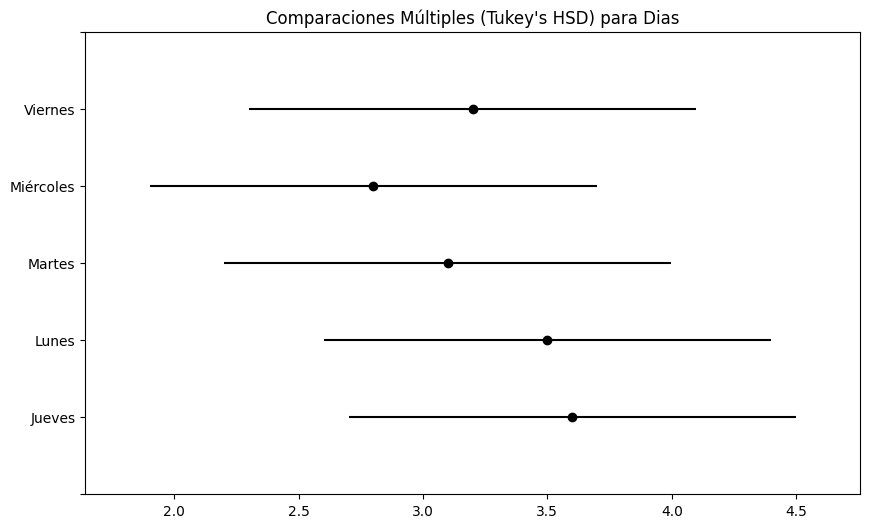

In [34]:
# @title **B. Comparaciones Múltiples (Tukey's HSD) para Dias**
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Perform Tukey's HSD test on the 'Dia' variable
# Note: The ANOVA for 'Dia' was not statistically significant.
# Performing post-hoc tests in this case should be interpreted with caution.
tukey_dia = pairwise_tukeyhsd(endog=df_silos_long['Temperatura'],     # Data
                              groups=df_silos_long['Dia'],          # Groups
                              alpha=0.05)                            # Significance level

# Display the results
print(tukey_dia)

# Plot the results
tukey_dia.plot_simultaneous()
plt.title('Comparaciones Múltiples (Tukey\'s HSD) para Dias')
plt.show()

LSD value (alpha=0.05): 0.7916

Pairwise comparisons (LSD approach - based on pairwise t-tests):
A vs B: p-value = 0.1231
A vs C: p-value = 0.0014
A vs D: p-value = 0.7404
A vs E: p-value = 0.0150
B vs C: p-value = 0.0291
B vs D: p-value = 0.1599
B vs E: p-value = 0.6195
C vs D: p-value = 0.0014
C vs E: p-value = 0.0251
D vs E: p-value = 0.0165


/tmp/ipython-input-1918317092.py:57: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Silo', y='Temperatura', data=mean_per_silo, palette='viridis', ci=None)
/tmp/ipython-input-1918317092.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Silo', y='Temperatura', data=mean_per_silo, palette='viridis', ci=None)


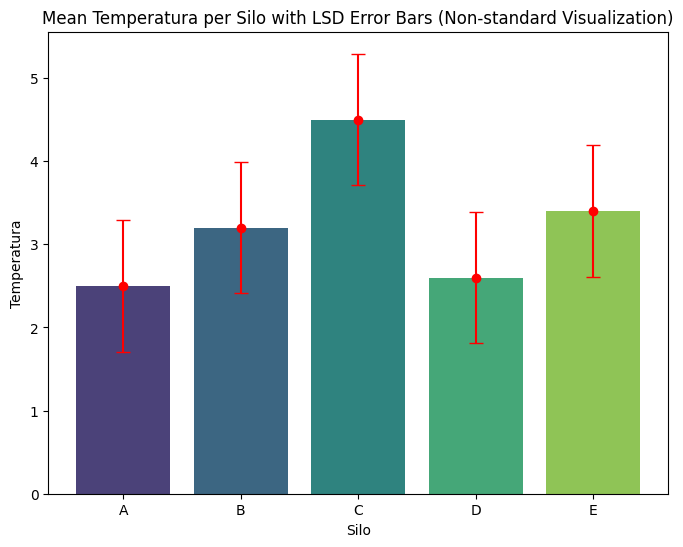

In [43]:
# @title **C. Comparaciones Múltiples (LSD) para Silos**

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# --- Modelo ANOVA ---
# Using the df_silos_long DataFrame for the current problem
model = smf.ols('Temperatura ~ C(Silo)', data=df_silos_long).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Obtener MSE (Mean Square Error = sum_sq / df del residual)
# Note: For RCBD, the MSE from the full model (Temperatura ~ Silo + Dia) is generally used
# as it accounts for block variability. Using MSE from a one-way ANOVA on Silo ignores blocks.
# For consistency with the provided LSD code structure, I'll use MSE from the one-way ANOVA.
# However, be aware this is a simplification for RCBD.
try:
    mse = anova_table.loc['Residual', 'sum_sq'] / anova_table.loc['Residual', 'df']
    n = df_silos_long.groupby('Silo').size().iloc[0]  # Número de observaciones por grupo (asumiendo balanceado)
    pooled_std = np.sqrt(mse)

    # --- LSD ---
    alpha = 0.05
    df_residual = int(anova_table.loc['Residual', 'df'])
    t_value = stats.t.ppf(1 - alpha/2, df_residual)
    lsd_value = t_value * pooled_std * np.sqrt(2/n)

    print(f"LSD value (alpha={alpha}): {lsd_value:.4f}")

    # --- Comparaciones pareadas ---
    silos = df_silos_long['Silo'].unique()
    comparisons = []
    p_values = []
    diffs = []

    for i in range(len(silos)):
        for j in range(i + 1, len(silos)):
            group1 = df_silos_long[df_silos_long['Silo'] == silos[i]]['Temperatura']
            group2 = df_silos_long[df_silos_long['Silo'] == silos[j]]['Temperatura']
            # Perform independent t-test assuming equal variances (pooled)
            ttest = ttest_ind(group1, group2, equal_var=True)
            comparisons.append(f'{silos[i]} vs {silos[j]}')
            p_values.append(ttest.pvalue)
            diffs.append(np.mean(group1) - np.mean(group2))

    print("\nPairwise comparisons (LSD approach - based on pairwise t-tests):")
    for i in range(len(comparisons)):
        print(f"{comparisons[i]}: p-value = {p_values[i]:.4f}")

    # --- Gráfico ---
    mean_per_silo = df_silos_long.groupby('Silo')['Temperatura'].mean().reset_index()

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Silo', y='Temperatura', data=mean_per_silo, palette='viridis', ci=None)

    # Eje x como índices numéricos para errorbar
    x_positions = np.arange(len(mean_per_silo))
    # Adding LSD as symmetric error bars is not the standard way to visualize LSD results.
    # LSD is typically used to determine if the difference between two means is statistically significant.
    # A common visualization is to add letters above bars indicating significant groupings based on pairwise comparisons.
    # However, based on the provided code structure, completing the errorbar call:
    plt.errorbar(x=x_positions,
                 y=mean_per_silo['Temperatura'],
                 yerr=lsd_value, # Using the calculated LSD value for symmetric error bars
                 fmt='o',        # Format as circles
                 capsize=5,      # Add caps to the error bars
                 color='red')    # Color the error bars red


    plt.title('Mean Temperatura per Silo with LSD Error Bars (Non-standard Visualization)')
    plt.xlabel('Silo')
    plt.ylabel('Temperatura')
    plt.show()

except Exception as e:
    print(f"\nAn error occurred: {e}")
    print("Please ensure df_silos_long is correctly defined and contains 'Silo' and 'Temperatura' columns.")

LSD value (alpha=0.05): 1.2516

Pairwise comparisons (LSD approach - based on pairwise t-tests) for Dias:
Lunes vs Martes: p-value = 0.4751
Lunes vs Miércoles: p-value = 0.1909
Lunes vs Jueves: p-value = 0.8718
Lunes vs Viernes: p-value = 0.6438
Martes vs Miércoles: p-value = 0.5830
Martes vs Jueves: p-value = 0.4492
Martes vs Viernes: p-value = 0.8819
Miércoles vs Jueves: p-value = 0.2133
Miércoles vs Viernes: p-value = 0.5346
Jueves vs Viernes: p-value = 0.5871


/tmp/ipython-input-3051316360.py:57: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dia', y='Temperatura', data=mean_per_day, palette='viridis', ci=None)
/tmp/ipython-input-3051316360.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dia', y='Temperatura', data=mean_per_day, palette='viridis', ci=None)


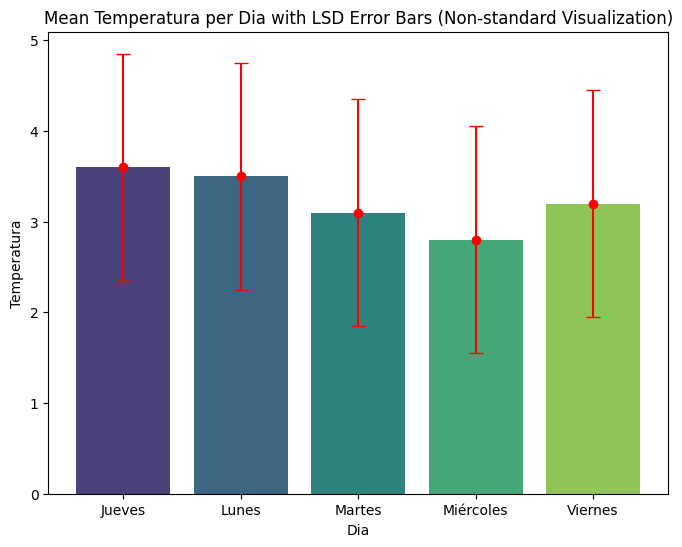

In [44]:
# @title **D. Comparaciones Múltiples (LSD) para Dias**

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# --- Modelo ANOVA ---
# Using the df_silos_long DataFrame for the current problem, analyzing 'Dia'
model = smf.ols('Temperatura ~ C(Dia)', data=df_silos_long).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Obtener MSE (Mean Square Error = sum_sq / df del residual)
# Note: For RCBD, the MSE from the full model (Temperatura ~ Silo + Dia) is generally used.
# Using MSE from a one-way ANOVA on Dia ignores the Silo blocking factor.
# Be aware this is a simplification.
try:
    mse = anova_table.loc['Residual', 'sum_sq'] / anova_table.loc['Residual', 'df']
    # Need to get the number of observations per day (assuming balanced)
    n = df_silos_long.groupby('Dia').size().iloc[0]
    pooled_std = np.sqrt(mse)

    # --- LSD ---
    alpha = 0.05
    df_residual = int(anova_table.loc['Residual', 'df'])
    t_value = stats.t.ppf(1 - alpha/2, df_residual)
    lsd_value = t_value * pooled_std * np.sqrt(2/n)

    print(f"LSD value (alpha={alpha}): {lsd_value:.4f}")

    # --- Comparaciones pareadas ---
    days = df_silos_long['Dia'].unique()
    comparisons = []
    p_values = []
    diffs = []

    for i in range(len(days)):
        for j in range(i + 1, len(days)):
            group1 = df_silos_long[df_silos_long['Dia'] == days[i]]['Temperatura']
            group2 = df_silos_long[df_silos_long['Dia'] == days[j]]['Temperatura']
            # Perform independent t-test assuming equal variances (pooled)
            ttest = ttest_ind(group1, group2, equal_var=True)
            comparisons.append(f'{days[i]} vs {days[j]}')
            p_values.append(ttest.pvalue)
            diffs.append(np.mean(group1) - np.mean(group2))

    print("\nPairwise comparisons (LSD approach - based on pairwise t-tests) for Dias:")
    for i in range(len(comparisons)):
        print(f"{comparisons[i]}: p-value = {p_values[i]:.4f}")

    # --- Gráfico ---
    mean_per_day = df_silos_long.groupby('Dia')['Temperatura'].mean().reset_index()

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Dia', y='Temperatura', data=mean_per_day, palette='viridis', ci=None)

    # Eje x como índices numéricos para errorbar
    x_positions = np.arange(len(mean_per_day))
    # Adding LSD as symmetric error bars is not the standard way to visualize LSD results.
    # LSD is typically used to determine if the difference between two means is statistically significant.
    # A common visualization is to add letters above bars indicating significant groupings based on pairwise comparisons.
    # However, based on the provided code structure, completing the errorbar call:
    plt.errorbar(x=x_positions,
                 y=mean_per_day['Temperatura'],
                 yerr=lsd_value, # Using the calculated LSD value for symmetric error bars
                 fmt='o',        # Format as circles
                 capsize=5,      # Add caps to the error bars
                 color='red')    # Color the error bars red


    plt.title('Mean Temperatura per Dia with LSD Error Bars (Non-standard Visualization)')
    plt.xlabel('Dia')
    plt.ylabel('Temperatura')
    plt.show()

except Exception as e:
    print(f"\nAn error occurred: {e}")
    print("Please ensure df_silos_long is correctly defined and contains 'Dia' and 'Temperatura' columns.")

[⬆️ Volver al inicio](#inicio)

<a name="T9"></a>
## **9. Supuesto del Modelo - Normalidad**

In [45]:
# @title **A. Normalidad Prueba de Shapiro Wilks (en la variable Temperatura)**
import scipy.stats as stats

# Perform Shapiro-Wilk test on the 'Temperatura' column
w, pvalue = stats.shapiro(df_silos_long['Temperatura'])

print(f"Shapiro-Wilk Test for Temperatura:")
print(f"W statistic: {w:.4f}")
print(f"p-value: {pvalue:.4f}")

# Interpretation
alpha = 0.05
if pvalue > alpha:
    print("\nConclusion: Fail to reject H0; the data appears to be normally distributed (at alpha = 0.05).")
else:
    print("\nConclusion: Reject H0; the data does not appear to be normally distributed (at alpha = 0.05).")

# Note: For checking the ANOVA assumption of normality, you should test the residuals of the model.

Shapiro-Wilk Test for Temperatura:
W statistic: 0.9317
p-value: 0.0951

Conclusion: Fail to reject H0; the data appears to be normally distributed (at alpha = 0.05).


Estás haciendo una excelente pregunta sobre dónde aplicar la prueba de normalidad en el contexto del ANOVA.

En el ANOVA, el supuesto de normalidad se aplica a los **residuos** del modelo, no necesariamente a los datos brutos de la variable de respuesta o las variables predictoras ('Silos' y 'Días').

Aquí te explico por qué:

*   **Variables Predictoras (Silos y Días):** Estas son variables categóricas. La verificación de normalidad no se aplica a datos categóricos.
*   **Variable de Respuesta (Temperatura):** Si bien verificar la normalidad de la variable de respuesta bruta a veces puede dar una idea general, el supuesto crítico para la validez de la prueba F del ANOVA es que los **errores (residuos)** del modelo están distribuidos normalmente. Los residuos representan la parte de la variable de respuesta que no es explicada por el modelo (los efectos de Silo y Día).

Por lo tanto, para verificar formalmente el supuesto de normalidad para tu modelo ANOVA, debes realizar la prueba de Shapiro-Wilk (u otras pruebas de normalidad) sobre los **residuos** obtenidos del modelo ANOVA ajustado.

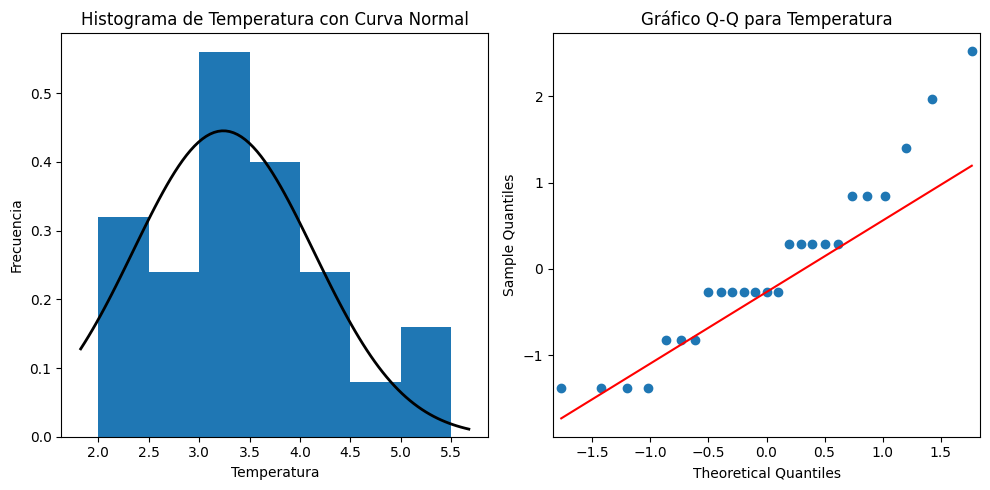

In [46]:
# @title **B. Pruebas Gráficas de Normalidad (en la variable Temperatura)**
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

# 1. Histograma con curva normal teórica
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.hist(df_silos_long['Temperatura'], bins=7, histtype='bar', ec='k', density=True)

# Calculate mean and standard deviation for the theoretical normal curve
mu, sigma = stats.norm.fit(df_silos_long['Temperatura'])

# Create the theoretical normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)

# Plot the theoretical normal curve
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel("Temperatura")
plt.ylabel('Frecuencia')
plt.title('Histograma de Temperatura con Curva Normal')

# 2. Gráfico Q-Q (Normal Probability Plot)
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sm.qqplot(
    df_silos_long['Temperatura'],
    fit   = True,
    line  = 'q',
    ax    = plt.gca() # Use current axes
)
plt.title('Gráfico Q-Q para Temperatura')


plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

# Note: For checking the ANOVA assumption of normality, these plots should be on the *residuals* of the model.

In [47]:
# @title **C. Residuos del Modelo**
# Access the residuals from the fitted ANOVA model
# Assuming the model object is named 'modelo' from the ANOVA cell
try:
    residuos = modelo.resid
    print("Residuos del modelo ANOVA:")
    display(residuos)
except NameError:
    print("Error: The model object 'modelo' was not found.")
    print("Please ensure the ANOVA analysis cell has been executed successfully.")

Residuos del modelo ANOVA:


,0
0,0.24
1,0.54
2,-0.26
3,-0.36
4,-0.16
5,0.14
6,-0.06
7,-0.36
8,-0.46
9,0.74


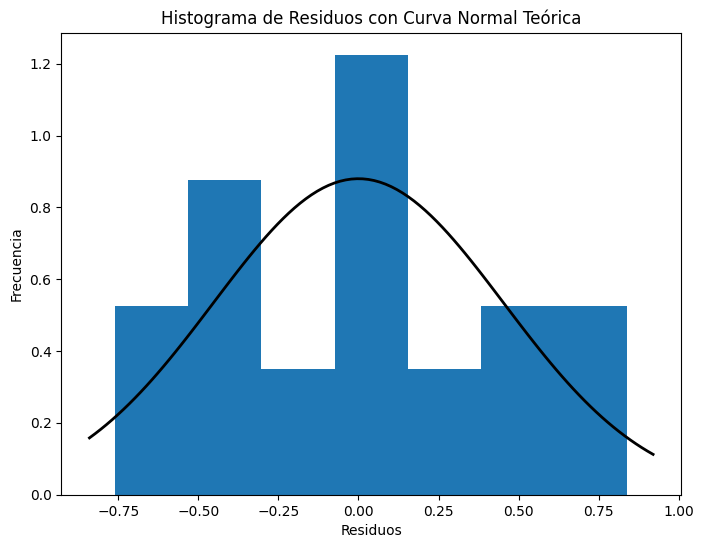

In [48]:
# @title **D. Histograma de Residuos con curva normal teórica**
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Assuming 'residuos' variable is available from the previous cell execution
try:
    plt.figure(figsize=(8, 6))
    plt.hist(residuos, bins=7, histtype='bar', ec='k', density=True) # Using 7 bins as an example

    # Calculate mean and standard deviation for the theoretical normal curve
    mu, sigma = stats.norm.fit(residuos)

    # Create the theoretical normal curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, sigma)

    # Plot the theoretical normal curve
    plt.plot(x, p, 'k', linewidth=2)

    plt.xlabel("Residuos")
    plt.ylabel('Frecuencia')
    plt.title('Histograma de Residuos con Curva Normal Teórica')
    plt.show()

except NameError:
    print("Error: 'residuos' variable not found.")
    print("Please ensure the cell calculating the residuals has been executed successfully.")
except Exception as e:
    print(f"An error occurred: {e}")

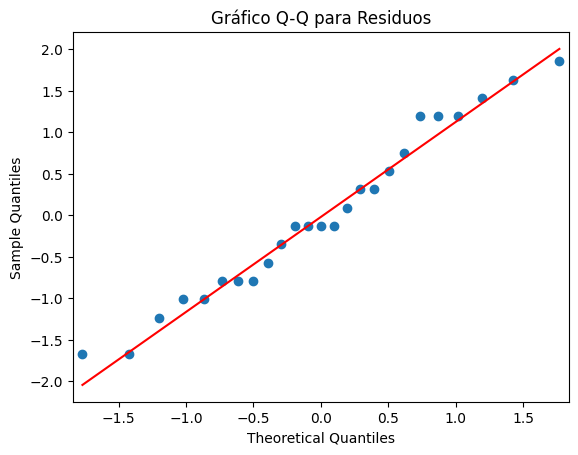

In [49]:
# @title **E. Gráfico Q-Q de Residuos**
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'residuos' variable is available from the residuals calculation cell
try:
    sm.qqplot(
        residuos,
        fit   = True,
        line  = 'q', # 'q' - a line is fit through the quartiles.
        ax    = None # Use default axes
    )
    plt.title('Gráfico Q-Q para Residuos')
    plt.show()

except NameError:
    print("Error: 'residuos' variable not found.")
    print("Please ensure the cell calculating the residuals has been executed successfully.")
except Exception as e:
    print(f"An error occurred: {e}")

[⬆️ Volver al inicio](#inicio)

<a name="T10"></a>
## **10. Homocedasticidad**

In [50]:
# @title **A. Homocedasticidad de los residuos: Usando la prueba de Levene (agrupado por Silo)**
import scipy.stats as stats

# Assuming 'residuos' variable is available from the residuals calculation cell
try:
    # Group residuals by Silo
    residuals_by_silo = [residuos[df_silos_long['Silo'] == silo] for silo in df_silos_long['Silo'].unique()]

    # Perform Levene's test on the residuals grouped by Silo
    resultado_levene_silo = stats.levene(*residuals_by_silo)

    # Interpretación
    print("="*60)
    print("PRUEBA DE LEVENE PARA HOMOCEDASTICIDAD DE RESIDUOS (Agrupado por Silo)")
    print("="*60)
    print(f"Estadístico de Levene: {resultado_levene_silo.statistic:.4f}")
    print(f"Valor p: {resultado_levene_silo.pvalue:.4f}")

    if resultado_levene_silo.pvalue > 0.05:
        print("✓ No se rechaza H0: Las varianzas de los residuos son homogéneas a través de los silos (p > 0.05)")
    else:
        print("✗ Se rechaza H0: Las varianzas de los residuos NO son homogéneas a través de los silos (p ≤ 0.05)")
    print("="*60)

except NameError:
    print("Error: 'residuos' variable or 'df_silos_long' DataFrame not found.")
    print("Please ensure the cells calculating residuals and creating df_silos_long have been executed successfully.")
except Exception as e:
    print(f"An error occurred: {e}")

PRUEBA DE LEVENE PARA HOMOCEDASTICIDAD DE RESIDUOS (Agrupado por Silo)
Estadístico de Levene: 0.5327
Valor p: 0.7132
✓ No se rechaza H0: Las varianzas de los residuos son homogéneas a través de los silos (p > 0.05)


In [52]:
# @title **B. Homocedasticidad de los residuos: Usando la prueba de Levene (agrupado por Dias)**
import scipy.stats as stats

# Assuming 'residuos' variable is available from the residuals calculation cell
try:
    # Group residuals by Dia
    residuals_by_dia = [residuos[df_silos_long['Dia'] == dia] for dia in df_silos_long['Dia'].unique()]

    # Perform Levene's test on the residuals grouped by Dia
    resultado_levene_dia = stats.levene(*residuals_by_dia)

    # Interpretación
    print("="*60)
    print("PRUEBA DE LEVENE PARA HOMOCEDASTICIDAD DE RESIDUOS (Agrupado por Dias)")
    print("="*60)
    print(f"Estadístico de Levene: {resultado_levene_dia.statistic:.4f}")
    print(f"Valor p: {resultado_levene_dia.pvalue:.4f}")

    if resultado_levene_dia.pvalue > 0.05:
        print("✓ No se rechaza H0: Las varianzas de los residuos son homogéneas a través de los dias (p > 0.05)")
    else:
        print("✗ Se rechaza H0: Las varianzas de los residuos NO son homogéneas a través de los dias (p ≤ 0.05)")
    print("="*60)

except NameError:
    print("Error: 'residuos' variable or 'df_silos_long' DataFrame not found.")
    print("Please ensure the cells calculating residuals and creating df_silos_long have been executed successfully.")
except Exception as e:
    print(f"An error occurred: {e}")

PRUEBA DE LEVENE PARA HOMOCEDASTICIDAD DE RESIDUOS (Agrupado por Dias)
Estadístico de Levene: 0.5673
Valor p: 0.6892
✓ No se rechaza H0: Las varianzas de los residuos son homogéneas a través de los dias (p > 0.05)


[⬆️ Volver al inicio](#inicio)

[⬆️ Volver al inicio](#inicio)